In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt   
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
data = pd.read_csv(r"C:\Users\84886\OneDrive - VietNam National University - HCM INTERNATIONAL UNIVERSITY\Desktop\IU\sem 2 năm 3\project 1\Dataset\cardio_train.csv", sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [33]:
data.isnull().values.any() #Check for missing values

False

In [13]:
data['years'] = (data['age'] / 365).round().astype('int')
data.drop(['age'], axis='columns', inplace=True)
data.drop(['id'], axis='columns', inplace=True)

data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,52
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,48


In [14]:
data['bmi'] = data['weight']/((data['height']/100)**2)
rating = []
for row in data['bmi']:
    if row < 18.5: rating.append(1)
    elif row > 18.5 and row < 24.9: rating.append(2)
    elif row > 24.9 and row < 29.9: rating.append(3)
    elif row > 29.9 : rating.append(4)
data['bmi_rank'] = rating
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,bmi_rank
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,2
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,4
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,2
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,3
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,2


In [15]:
data['MAP'] = ((2*data['ap_lo'])+data['ap_hi'])/3
map_rank = []
for row in data['MAP']:
    if row < 69.9: map_rank.append(1)
    elif row > 70 and row < 99.9: map_rank.append(2)
    elif row > 100: map_rank.append(3)
    else:           map_rank.append('Not_Rated')
data['MAP_rank'] = map_rank
data.head()


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,bmi_rank,MAP,MAP_rank
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,2,90.000000,2
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,4,106.666667,3
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,2,90.000000,2
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,3,116.666667,3
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,2,73.333333,2


In [16]:
data.corr().style.background_gradient()

C:\Users\84886\AppData\Local\Temp\ipykernel_22824\84807061.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient()


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,bmi_rank,MAP
gender,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017,-0.096529,-0.083329,0.016301
height,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456,-0.290642,-0.174122,0.007726
weight,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661,0.762009,0.756861,0.051784
ap_hi,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793,0.024852,0.025449,0.390921
ap_lo,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754,0.035345,0.038203,0.926593
cholesterol,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386,0.146270,0.164860,0.031054
gluc,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596,0.101390,0.109249,0.014401
smoke,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884,-0.027215,-0.017795,0.004427
alco,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,-0.029918,0.014394,0.023868,0.010289
active,0.005866,-0.006570,-0.016867,-0.000033,0.004780,0.009911,-0.006770,0.025858,0.025476,1.000000,-0.035653,-0.009819,-0.014261,-0.009597,0.004388


In [37]:
data.info(['map_rank'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
 12  years        70000 non-null  int32  
 13  bmi          70000 non-null  float64
 14  bmi_rank     70000 non-null  int64  
 15  MAP          70000 non-null  float64
 16  MAP_rank     70000 non-null  object 
dtypes: float64(3), int32(1), int64(12), object(1)
memory usage: 8.8+ MB


In [18]:
data= data[["gender","height","weight","bmi","ap_hi","ap_lo","MAP","bmi","years","bmi_rank","MAP_rank","cholesterol","gluc","smoke","active","cardio"]]
data.head()

,gender,height,weight,bmi,ap_hi,ap_lo,MAP,bmi,years,bmi_rank,MAP_rank,cholesterol,gluc,smoke,active,cardio
0,2,168,62.0,21.967120,110,80,90.000000,21.967120,50,2,2,1,1,0,1,0
1,1,156,85.0,34.927679,140,90,106.666667,34.927679,55,4,3,3,1,0,1,1
2,1,165,64.0,23.507805,130,70,90.000000,23.507805,52,2,2,3,1,0,0,1
3,2,169,82.0,28.710479,150,100,116.666667,28.710479,48,3,3,1,1,0,1,1
4,1,156,56.0,23.011177,100,60,73.333333,23.011177,48,2,2,1,1,0,0,0


In [19]:
data.drop(['MAP_rank'], axis=1, inplace=True)
X= data.iloc[:,:14].values
X

C:\Users\84886\AppData\Local\Temp\ipykernel_22824\731985198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['MAP_rank'], axis=1, inplace=True)


array([[  2., 168.,  62., ...,   1.,   0.,   1.],
       [  1., 156.,  85., ...,   1.,   0.,   1.],
       [  1., 165.,  64., ...,   1.,   0.,   0.],
       ...,
       [  2., 183., 105., ...,   1.,   0.,   0.],
       [  1., 163.,  72., ...,   2.,   0.,   0.],
       [  1., 170.,  72., ...,   1.,   0.,   1.]])

In [41]:
data.head()


,gender,height,weight,bmi,ap_hi,ap_lo,MAP,bmi,years,bmi_rank,cholesterol,gluc,smoke,active,cardio
0,2,168,62.0,21.967120,110,80,90.000000,21.967120,50,2,1,1,0,1,0
1,1,156,85.0,34.927679,140,90,106.666667,34.927679,55,4,3,1,0,1,1
2,1,165,64.0,23.507805,130,70,90.000000,23.507805,52,2,3,1,0,0,1
3,2,169,82.0,28.710479,150,100,116.666667,28.710479,48,3,1,1,0,1,1
4,1,156,56.0,23.011177,100,60,73.333333,23.011177,48,2,1,1,0,0,0


In [20]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\84886\miniconda3\envs\AITutorialM1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\84886\miniconda3\envs\AITutorialM1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\84886\miniconda3\envs\AITutorialM1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\84886\miniconda3\envs\AITutorialM1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [43]:
wcss

[5478714490.355726,
 3134437858.114147,
 1372342640.1486688,
 189060469.14124367,
 153872123.5652266,
 120568037.56717667,
 98449827.97501367,
 84626668.19171582,
 71488169.6002258,
 64907524.65838586]

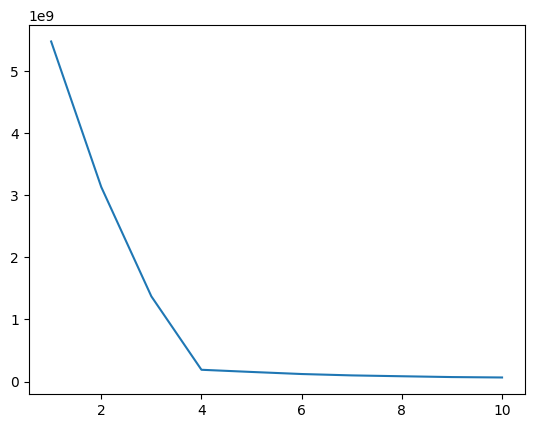

In [44]:
plt.plot(range(1,11),wcss)

In [45]:
kmeans = KMeans(n_clusters=4, init= 'k-means++')
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
pd.concat([data, pd.DataFrame(y_kmeans)], axis=1)

,gender,height,weight,bmi,ap_hi,ap_lo,MAP,bmi,years,bmi_rank,cholesterol,gluc,smoke,active,cardio,0
0,2,168,62.0,21.967120,110,80,90.000000,21.967120,50,2,1,1,0,1,0,0
1,1,156,85.0,34.927679,140,90,106.666667,34.927679,55,4,3,1,0,1,1,0
2,1,165,64.0,23.507805,130,70,90.000000,23.507805,52,2,3,1,0,0,1,0
3,2,169,82.0,28.710479,150,100,116.666667,28.710479,48,3,1,1,0,1,1,0
4,1,156,56.0,23.011177,100,60,73.333333,23.011177,48,2,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,26.927438,120,80,93.333333,26.927438,53,3,1,1,1,1,0,0
69996,1,158,126.0,50.472681,140,90,106.666667,50.472681,62,4,2,2,0,1,1,0
69997,2,183,105.0,31.353579,180,90,120.000000,31.353579,52,4,3,1,0,0,1,0
69998,1,163,72.0,27.099251,135,80,98.333333,27.099251,61,3,1,2,0,0,1,0


In [47]:
silhouette = silhouette_score(X, kmeans.labels_)
inertia_value = kmeans.inertia_


In [48]:
print("Silhouette Score:", silhouette)
print("Inertia:", inertia_value)

Silhouette Score: 0.9650838678544599
Inertia: 189060469.14124367
